## Processo de entendimento e preparação dos dados

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

## Profilling and visualization
from ydata_profiling import ProfileReport

import utils as ut

In [2]:
raw_data = pd.read_excel('data/testePraticoAirbnb.xlsx', engine= 'openpyxl')
raw_data.head()

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
0,t,moderate,t,1.0,Western Addition,3776931.0,-12243386.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,1.0,180.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f,strict_14_with_grace_period,f,2.0,Bernal Heights,3774511.0,-12242102.0,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,Real Bed,30.0,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776669.0,-1224525.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,3776487.0,-12245183.0,Apartment,Private room,2.0,4.0,1.0,1.0,Real Bed,32.0,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,f,strict_14_with_grace_period,f,2.0,Western Addition,3777525.0,-12243637.0,House,Entire home/apt,5.0,2022-05-01 00:00:00,2.0,2.0,Real Bed,7.0,27.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Um ponto muito importante é inspecionar o tipo das variáveis e ver se eles foram corretamente inferidos pelo pandas. Caso não estejam, devamos ajustar.

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               7146 non-null   object 
 1   cancellation_policy             7146 non-null   object 
 2   instant_bookable                7146 non-null   object 
 3   host_total_listings_count       7146 non-null   float64
 4   neighbourhood_cleansed          7146 non-null   object 
 5   latitude                        7146 non-null   float64
 6   longitude                       7146 non-null   float64
 7   property_type                   7146 non-null   object 
 8   room_type                       7146 non-null   object 
 9   accommodates                    7146 non-null   float64
 10  bathrooms                       7146 non-null   object 
 11  bedrooms                        7146 non-null   float64
 12  beds                            71

Após uma avaliação incial dos campos obtidos, pude observar que a coluna bathrooms foi interpretada como object, quando o correto deveria ser como int ou float. vou analisar a coluna e identificar oque causa o erro de tipagem

In [4]:
raw_data['bathrooms'].value_counts()

bathrooms
1.0                    5145
2.0                    1005
2022-05-01 00:00:00     480
2022-05-02 00:00:00     173
3.0                     132
2022-05-03 00:00:00      54
0.0                      39
4.0                      32
5.0                      26
0.5                      17
8.0                      15
10.0                     12
2022-05-04 00:00:00       8
6.0                       6
14.0                      1
2022-05-05 00:00:00       1
Name: count, dtype: int64

In [5]:
raw_data['bathrooms'].value_counts(normalize=True) * 100

bathrooms
1.0                    71.998321
2.0                    14.063812
2022-05-01 00:00:00     6.717045
2022-05-02 00:00:00     2.420935
3.0                     1.847187
2022-05-03 00:00:00     0.755668
0.0                     0.545760
4.0                     0.447803
5.0                     0.363840
0.5                     0.237895
8.0                     0.209908
10.0                    0.167926
2022-05-04 00:00:00     0.111951
6.0                     0.083963
14.0                    0.013994
2022-05-05 00:00:00     0.013994
Name: proportion, dtype: float64

Podemos observar que em muitos em aproximadamente 10% dos casos, uma data é exibida ao invés do valor correto. Caso essa quantidade fosse bem pequena, poderiamos considerar a remoção destes registos, mas neste caso para que não haja a perda de dados, a abordagem mais interessante seria aplicar alguma técnica de inputação de dados.

A principio vamos converter as datas para um valor nulo e posteriormente inputar valores.

In [6]:
raw_data['bathrooms'] = pd.to_numeric(raw_data['bathrooms'], errors='coerce')
raw_data['bathrooms'].value_counts(normalize=True, dropna=False) * 100

bathrooms
1.0     71.998321
2.0     14.063812
NaN     10.019591
3.0      1.847187
0.0      0.545760
4.0      0.447803
5.0      0.363840
0.5      0.237895
8.0      0.209908
10.0     0.167926
6.0      0.083963
14.0     0.013994
Name: proportion, dtype: float64

Após todos os dados estarem em um formato inicialmente adequado, utilizarei um pacote de profilling para auxiliar no processo de EDA (Exploratory Data Analysis) gerando de forma automática as princeiras informações sobre o banco de dados.

In [7]:
# profile = ProfileReport(raw_data, title="Airbnb data report")
# profile.to_file("airbnb_data_report.html")

A partir do overview gerado no profile é possível notar que não temos um número grande de dados faltantes e nem há linhas duplicadas na tabela.

Na aba de alertas podemos ver que existem alguns pontos de atenção que serão avaliados.

O primeiro ponto é a falta de balanceamento nas colunas bed_type, bedrooms_na, bathrooms_na e beds_na. na coluna bed_type, quase 99% dos dados pertecema mesma categoria, e avaliando sua diferença em relação ao preeço com as categorias minoritária, parece não ter impacto importante, portanto o bed_type será remivido. Ao explorar as colunas com final 'na', parece que há algo errado com a coluna ou com sua descrição, dado que a descrição diz que as colunas com final 'na' trazem o numero de avaliações, e estas são variáveis dicotomicas. Devido a essa inconsistência e a dificuldade em identificar o sentido dessas variáveis, as removerei da análise a principio, mas no futuro, pode ser interessante testar o impacto destas variáveis.



In [8]:
colunas_a_remover = [coluna for coluna in raw_data.columns if coluna.endswith('_na')]
raw_data = raw_data.drop(columns=colunas_a_remover)
raw_data = raw_data.drop(columns=['bed_type'])

O segundo ponto na aba de alertas é a quantidade de dados faltantes na coluna bathrooms. Neste caso a estratégia será a inputação de dados.

Nas colunas bedrooms, beds e number_of_reviews, estão sendo apontados grande quantidade de zeros. Na coluna number_of_reviews não parece haver nada de errado com a alta quantidade de zeros (19,3%) pois de fato a acomodação pode não ter sido avaliada.  No entanto, para as colunas beds  e bedroom, haver zeros parece estranho. A principio seguirei com estes valores na análise, mas deixando-os destacados e em mente caso tenham algum impacto no futuro.

Outro ponto importante é o fato de estarmos lidando com acomodações, e que podem apresentar diferença de preços de acordo com a localização. Embora tenhamos o bairro descrito, vamos mostrar num mapa a localização das casas.

Precisarei corrigir os campos latitude e longitude para o formato correto.

In [9]:
raw_data['latitude_cleansed'] = raw_data['latitude'].apply(
    lambda x: ut.convert_latitude_ou_longitude(x, tipo='lat')
    )
raw_data['longitude_cleansed'] = raw_data['longitude'].apply(
    lambda x: ut.convert_latitude_ou_longitude(x, tipo='long')
    )
raw_data.tail()

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,latitude_cleansed,longitude_cleansed
7141,f,flexible,t,18.0,Noe Valley,3774884.0,-1224283.0,House,Entire home/apt,3.0,1.0,1.0,2.0,30.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,163.0,37.74884,-122.42830
7142,t,flexible,t,10.0,Russian Hill,3780645.0,-12242109.0,Guest suite,Entire home/apt,2.0,1.0,0.0,1.0,1.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,160.0,37.80645,-122.42109
7143,t,flexible,t,10.0,Western Addition,3778855.0,-1224311.0,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,2.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,249.0,37.78855,-122.43110
7144,f,flexible,t,87.0,Downtown/Civic Center,3778645.0,-12241458.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,30.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,105.0,37.78645,-122.41458
7145,f,flexible,f,87.0,Downtown/Civic Center,3778645.0,-12241458.0,Apartment,Entire home/apt,5.0,1.0,2.0,2.0,30.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,125.0,37.78645,-122.41458


<Axes: >

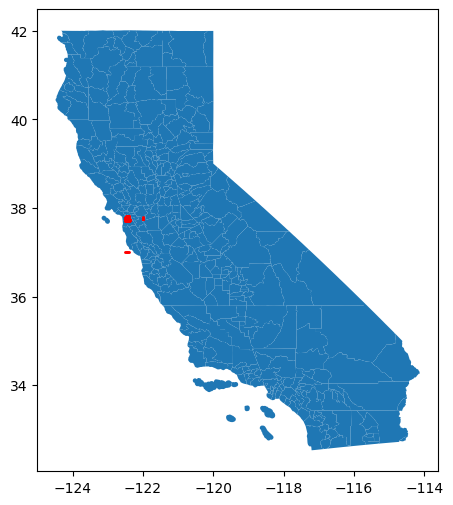

In [10]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



world = gpd.read_file('data/tl_2019_06_cousub.shp')#gpd.datasets.get_path('naturalearth_lowres'))

geometry = [Point(xy) for xy in zip(raw_data['longitude_cleansed'], raw_data['latitude_cleansed'])]
gdf = GeoDataFrame(raw_data, 
                  crs=world.crs,
                  geometry = geometry)



gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1)



Através do mapa e de pesquisas é posível identificar que as acomodações estão situadas na regisão de São francisco, na california.

A nossa variável de interesse é o preço, então, vamos explorar as demais variáveis em relação ao preço

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

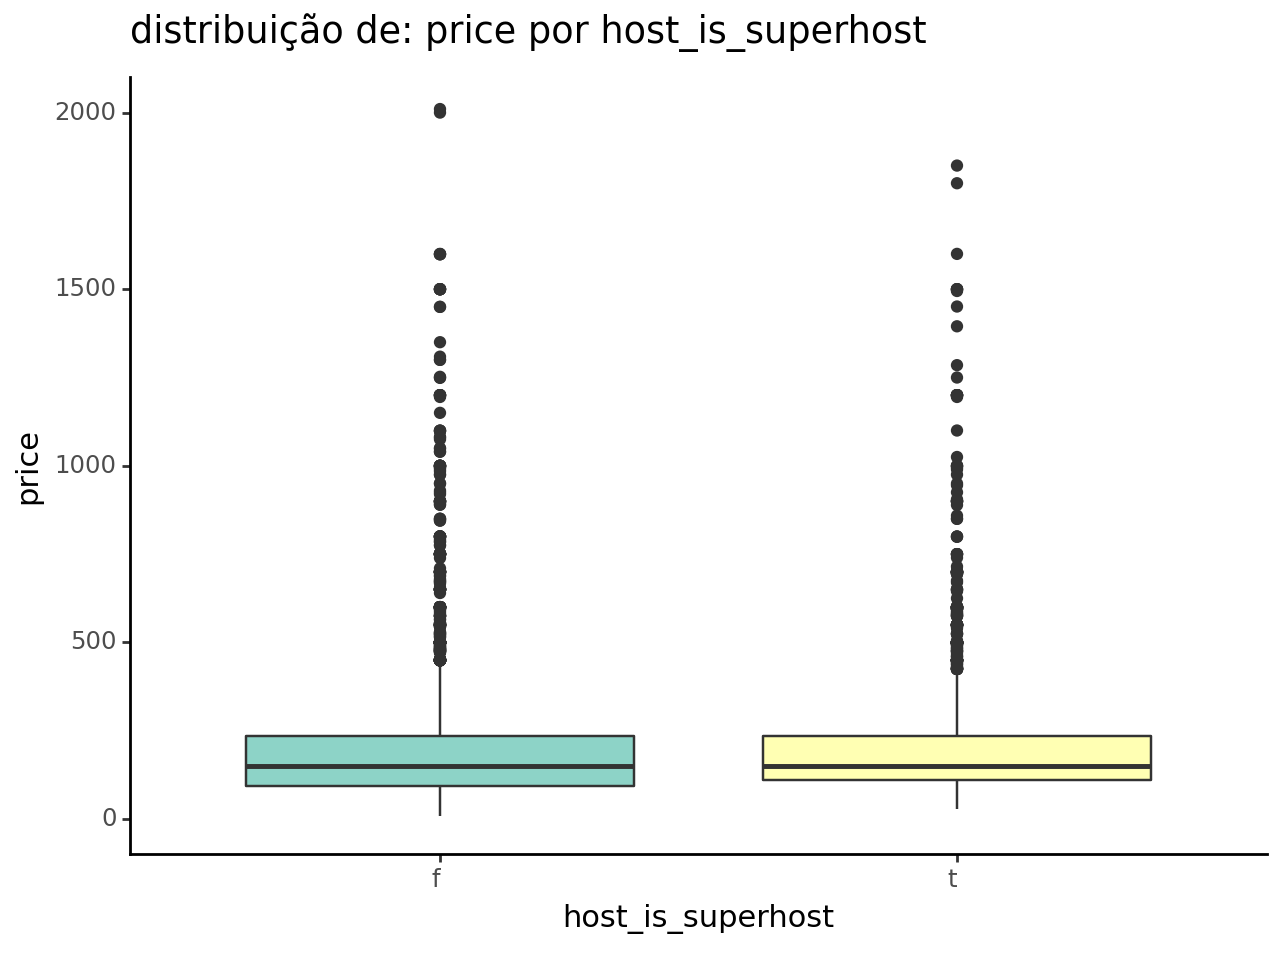

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
host_is_superhost,,,,,,,,,,,,,,,
f,4215,58.98,214.76,350.57,10.0,65.0,85.0,100.0,127.6,150.0,177.0,201.0,269.0,399.0,10000.0
t,2931,41.02,211.22,244.26,28.0,81.0,100.0,122.0,139.0,151.0,180.0,216.0,259.0,360.0,8000.0


In [12]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'host_is_superhost',
                       ylim= 2000)

ut.tabela_descritiva(var1= 'price',
                      var2= 'host_is_superhost',
                      df = raw_data)

Aparentemente, o fato do host ser um super host não afeta tanto no valor do aluguel.

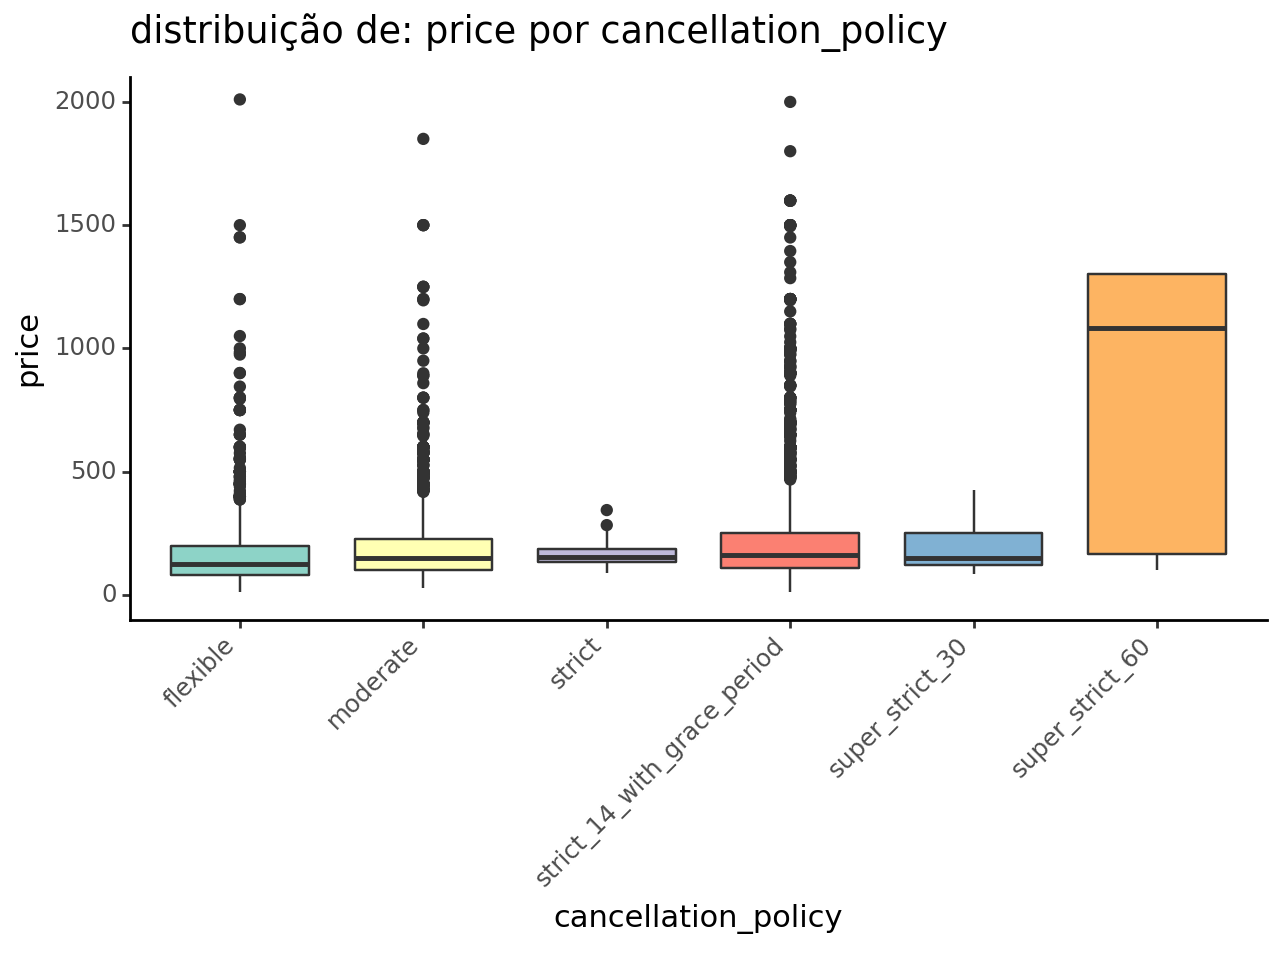

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
cancellation_policy,,,,,,,,,,,,,,,
flexible,1424,19.93,187.82,360.48,10.0,55.0,75.0,86.9,105.0,125.0,150.0,194.1,239.4,300.0,10000.0
moderate,2518,35.24,199.27,239.75,29.0,79.0,99.0,116.0,135.0,150.0,175.2,200.0,250.0,350.0,8000.0
strict,43,0.60,166.02,49.69,89.0,123.6,130.0,133.0,138.8,152.0,163.6,179.8,196.6,222.4,344.0
strict_14_with_grace_period,3086,43.18,234.09,309.15,10.0,75.0,99.0,120.0,144.0,160.0,190.0,229.0,299.0,450.0,9000.0
super_strict_30,66,0.92,182.80,81.57,85.0,92.0,111.0,133.5,135.0,150.0,179.0,249.0,259.0,269.0,424.0
super_strict_60,9,0.13,1499.33,2499.20,100.0,120.8,148.8,166.4,352.4,1082.0,1218.0,1280.8,1300.0,2640.0,8000.0


In [13]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'cancellation_policy',
                       ylim= 2000,
                       rotation = 45)

ut.tabela_descritiva(var1= 'price',
                      var2= 'cancellation_policy',
                      df = raw_data)

Aparentemente, a politica de cancelamente 'super_strict_60' parece apresentar maiores preços, no entando há apenas 9 casos com cancelamento em até 60 dias. Entre as outras categorias, parece haver pequenas variações.

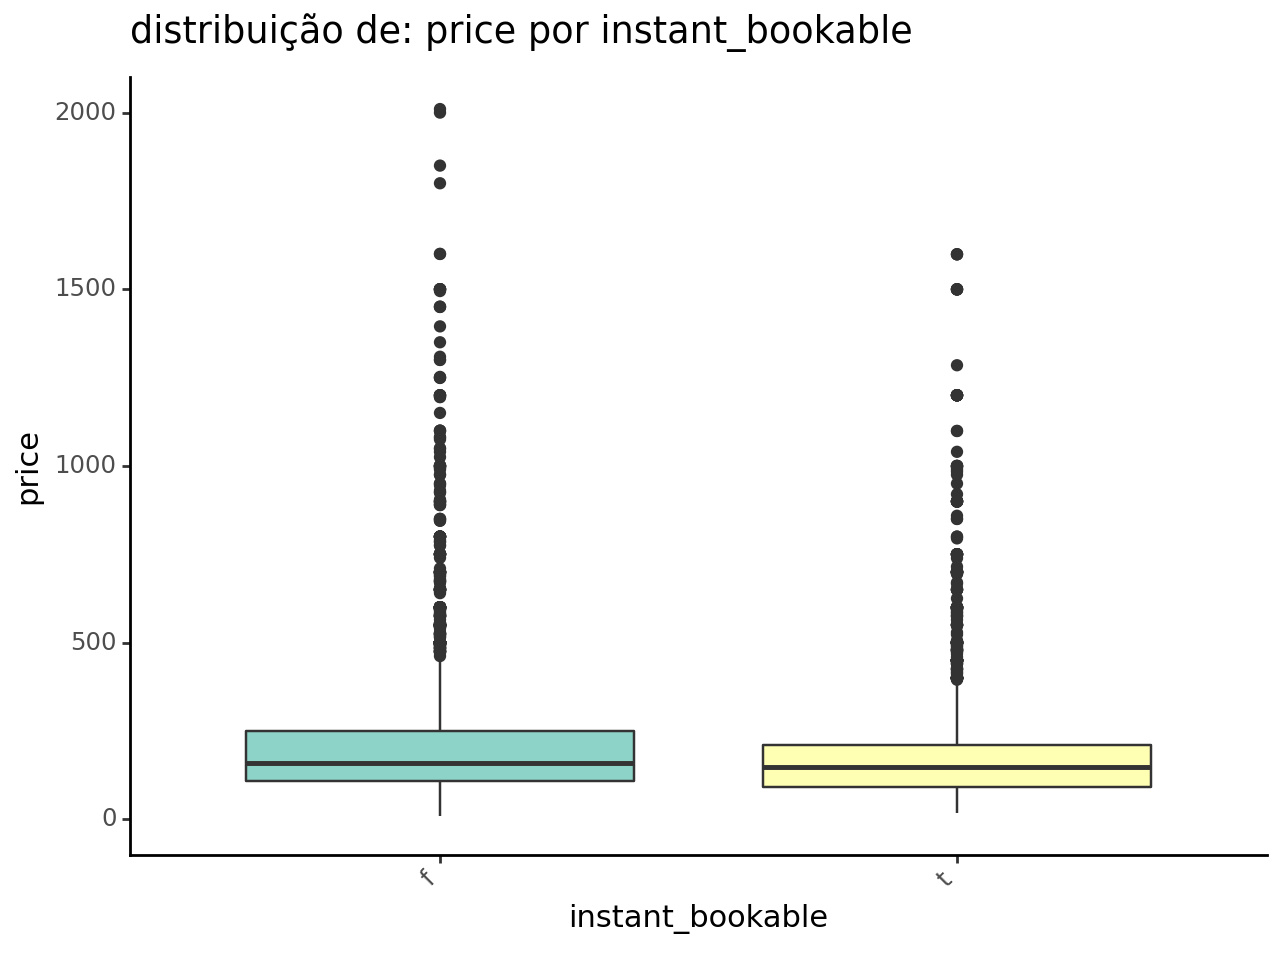

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
instant_bookable,,,,,,,,,,,,,,,
f,4430,61.99,218.54,262.67,10.0,76.0,99.0,120.0,140.0,159.0,189.0,225.0,279.2,400.0,10000.0
t,2716,38.01,204.78,377.47,19.0,66.0,80.0,100.0,120.0,147.0,164.0,198.0,250.0,349.5,9000.0


In [14]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'instant_bookable',
                       ylim= 2000,
                       rotation = 45)

ut.tabela_descritiva(var1= 'price',
                      var2='instant_bookable',
                      df = raw_data)

Aparentemente, as acomodações qeu não reserva instantanea, parecem apresentar  preços um pouco maiores.

c:\Users\DTI Digital\Desktop\TestePratico\airbnb\.venv\lib\site-packages\mizani\palettes.py:419: UserWarning: Warning message:Brewer palette Set3 has a maximum of 12 colors Returning the palette you asked for with that many colors


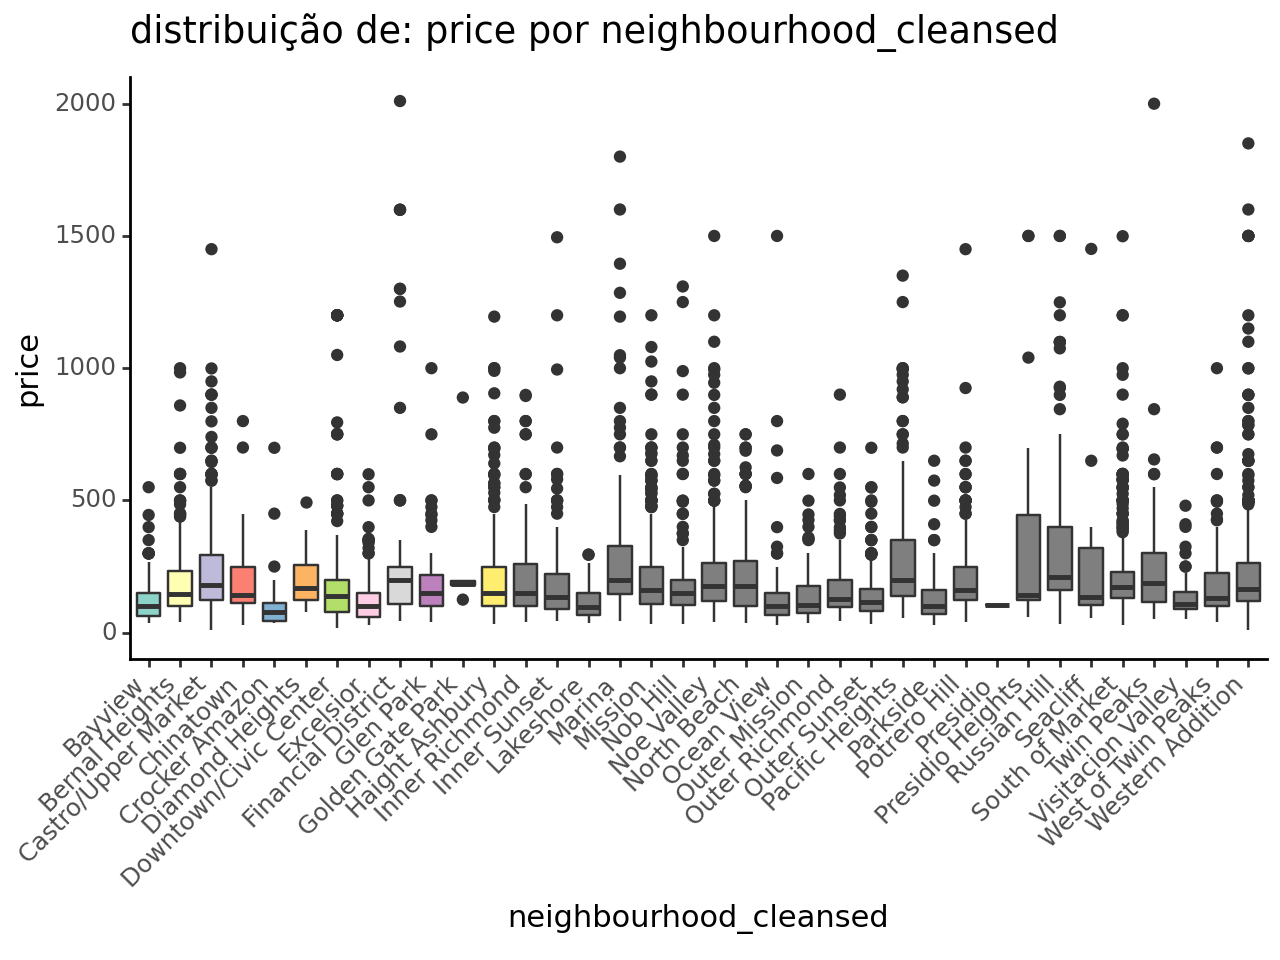

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
neighbourhood_cleansed,,,,,,,,,,,,,,,
Bayview,157,2.20,121.61,83.00,36.0,50.0,60.0,67.6,80.0,99.0,110.6,131.8,169.4,225.0,550.0
Bernal Heights,373,5.22,183.47,126.34,39.0,80.0,95.4,108.6,125.0,145.0,171.0,200.0,250.0,320.0,1000.0
Castro/Upper Market,405,5.67,235.95,174.60,10.0,97.0,110.8,133.4,153.0,180.0,201.2,250.0,329.0,464.8,1450.0
Chinatown,118,1.65,179.90,122.98,30.0,30.0,95.8,120.2,135.8,141.5,156.4,208.6,250.0,350.0,800.0
Crocker Amazon,52,0.73,101.92,109.37,35.0,40.0,40.2,50.0,52.6,78.0,89.6,97.1,120.6,172.6,699.0
Diamond Heights,19,0.27,201.89,110.80,80.0,80.0,103.8,147.2,160.0,170.0,197.6,228.0,287.8,314.0,495.0
Downtown/Civic Center,538,7.53,174.68,164.92,19.0,69.7,79.0,85.0,110.0,140.0,171.2,199.0,229.0,269.0,1200.0
Excelsior,162,2.27,123.57,95.81,30.0,45.0,58.2,69.0,82.6,100.0,109.0,132.5,155.0,234.0,599.0
Financial District,134,1.88,266.83,329.43,45.0,49.2,99.6,138.6,170.0,200.0,215.0,250.0,279.4,343.7,2010.0


In [15]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'neighbourhood_cleansed',
                       ylim= 2000,
                       rotation = 45)

ut.tabela_descritiva(var1= 'price',
                      var2= 'neighbourhood_cleansed',
                      df = raw_data)

Podemos notar uma grande quantidade de bairros, e essa grande quantidade pode chegar a confundir o modelo utilizado para predição do preço.  Como o nosso interesse é em relação ao preço, agruparei os bairros em regões de acordo com a mediana do bairro. A escolha de mediana como métrica, se dá devido ao fato de que as distribuições de preço em cada bairro está bastante assimétrica.E dado a escolha de agrupar os bairros por preço, por hora vou ignorar a localização geográfica das casas, removendo os campos latitude e longitude.

In [16]:
ut.tabela_descritiva(var1= 'price',
                      var2= 'neighbourhood_cleansed',
                      df = raw_data).reset_index()['Mediana'].sort_values()
## A ordenaçãos erá feita em regiões de 50 em 50 dolares

4      78.0
14     96.5
0      99.0
20     99.0
25     99.0
7     100.0
21    103.5
27    105.0
33    109.5
23    117.0
22    129.0
34    130.0
30    134.5
13    135.0
6     140.0
3     141.5
28    142.5
1     145.0
17    150.0
9     150.0
12    150.0
11    150.0
16    160.0
26    161.0
35    165.0
5     170.0
31    172.0
18    175.0
19    175.0
2     180.0
10    185.0
32    188.0
24    199.0
15    200.0
8     200.0
29    210.0
Name: Mediana, dtype: float64

In [17]:
bins = np.arange(0, np.ceil(max(raw_data['price']) / 50) * 50 + 50, 50)
raw_data['price_region'] =pd.cut(raw_data['price'], bins=bins, right=False, labels=[f'region {i}-{i+50}' for i in bins[:-1]])
raw_data = raw_data.drop(columns=['neighbourhood_cleansed', 'latitude','longitude', 'latitude_cleansed', 'longitude_cleansed'])
raw_data.head()

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,price_region
0,t,moderate,t,1.0,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,1.0,180.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0,region 150.0-200.0
1,f,strict_14_with_grace_period,f,2.0,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,30.0,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,region 200.0-250.0
2,f,strict_14_with_grace_period,f,10.0,Apartment,Private room,2.0,4.0,1.0,1.0,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0,region 50.0-100.0
3,f,strict_14_with_grace_period,f,10.0,Apartment,Private room,2.0,4.0,1.0,1.0,32.0,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,65.0,region 50.0-100.0
4,f,strict_14_with_grace_period,f,2.0,House,Entire home/apt,5.0,NaN,2.0,2.0,7.0,27.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,785.0,region 750.0-800.0


In [18]:
## create othr region
raw_data['price_region'] = raw_data['price_region'].astype(str)
contagem_categorias = raw_data['price_region'].value_counts()
categorias_a_agrupar = contagem_categorias[contagem_categorias < 100].index
raw_data['price_region'] = raw_data['price_region'].replace(categorias_a_agrupar, 'Others')

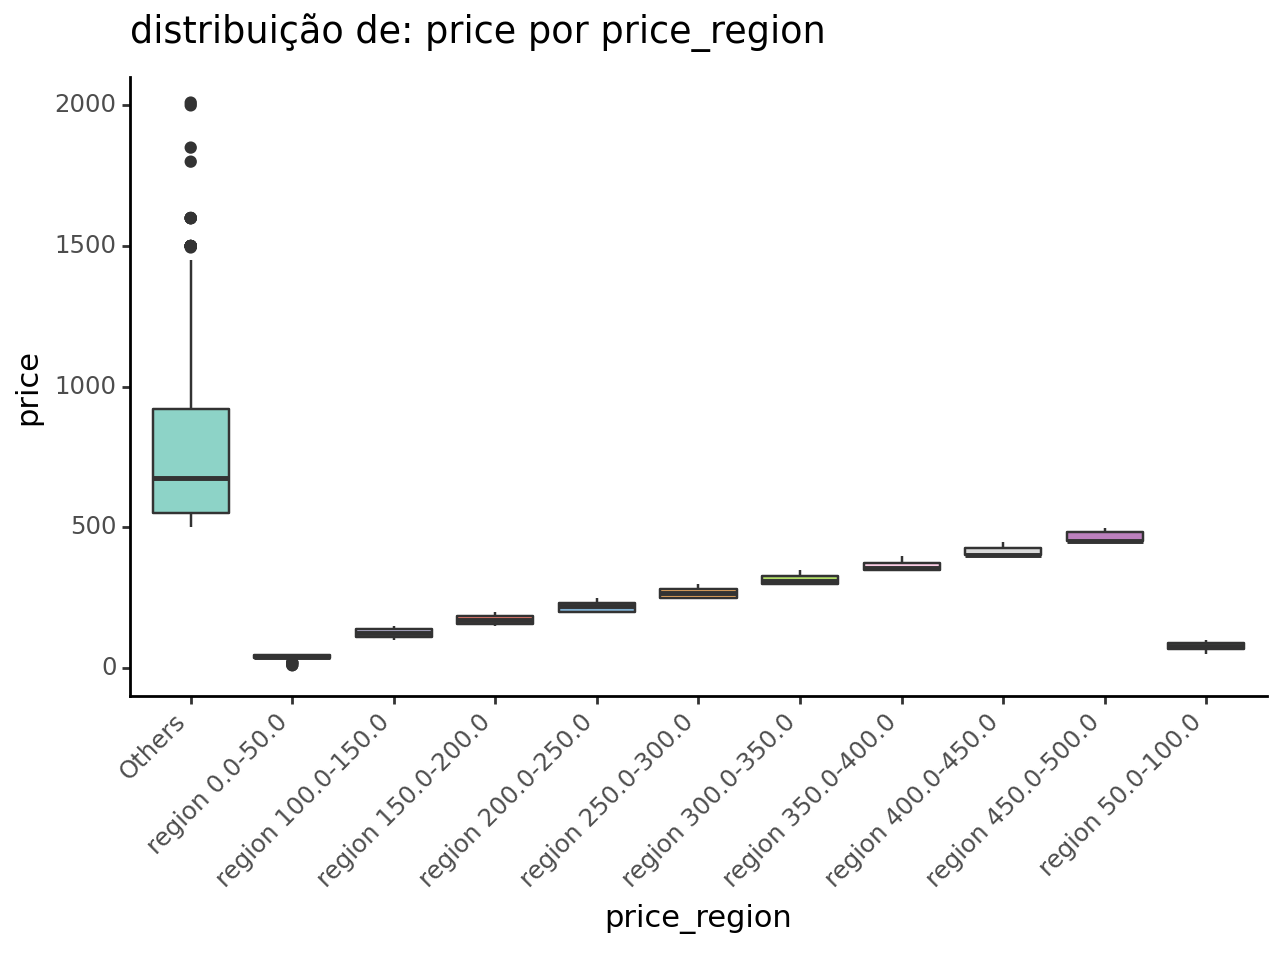

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
price_region,,,,,,,,,,,,,,,
Others,435,6.09,913.35,967.45,500.0,500.0,549.0,575.2,600.0,675.0,750.0,850.0,1000.0,1300.0,10000.0
region 0.0-50.0,219,3.06,39.69,6.72,10.0,30.0,35.0,38.0,39.2,40.0,40.0,45.0,45.0,48.0,49.0
region 100.0-150.0,1673,23.41,123.82,14.93,100.0,100.0,109.0,115.0,120.0,125.0,129.0,135.0,140.0,145.0,149.0
region 150.0-200.0,1354,18.95,170.73,16.42,150.0,150.0,150.0,159.0,164.0,170.0,175.0,180.0,189.0,195.0,199.0
region 200.0-250.0,722,10.10,218.86,15.69,200.0,200.0,200.0,206.0,215.0,219.5,225.0,227.7,233.0,241.0,249.0
region 250.0-300.0,526,7.36,268.61,17.51,250.0,250.0,250.0,250.0,259.0,265.0,275.0,279.5,289.0,295.0,299.0
region 300.0-350.0,268,3.75,315.27,16.82,300.0,300.0,300.0,300.0,300.0,309.5,323.4,325.0,331.6,340.0,349.0
region 350.0-400.0,201,2.81,364.87,18.12,350.0,350.0,350.0,350.0,350.0,355.0,365.0,375.0,387.0,395.0,399.0
region 400.0-450.0,125,1.75,413.36,16.70,400.0,400.0,400.0,400.0,400.0,400.0,417.4,425.0,425.0,440.0,449.0


In [19]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'price_region',
                       ylim= 2000,
                       rotation = 45)

ut.tabela_descritiva(var1= 'price',
                      var2= 'price_region',
                      df = raw_data)

c:\Users\DTI Digital\Desktop\TestePratico\airbnb\.venv\lib\site-packages\mizani\palettes.py:419: UserWarning: Warning message:Brewer palette Set3 has a maximum of 12 colors Returning the palette you asked for with that many colors


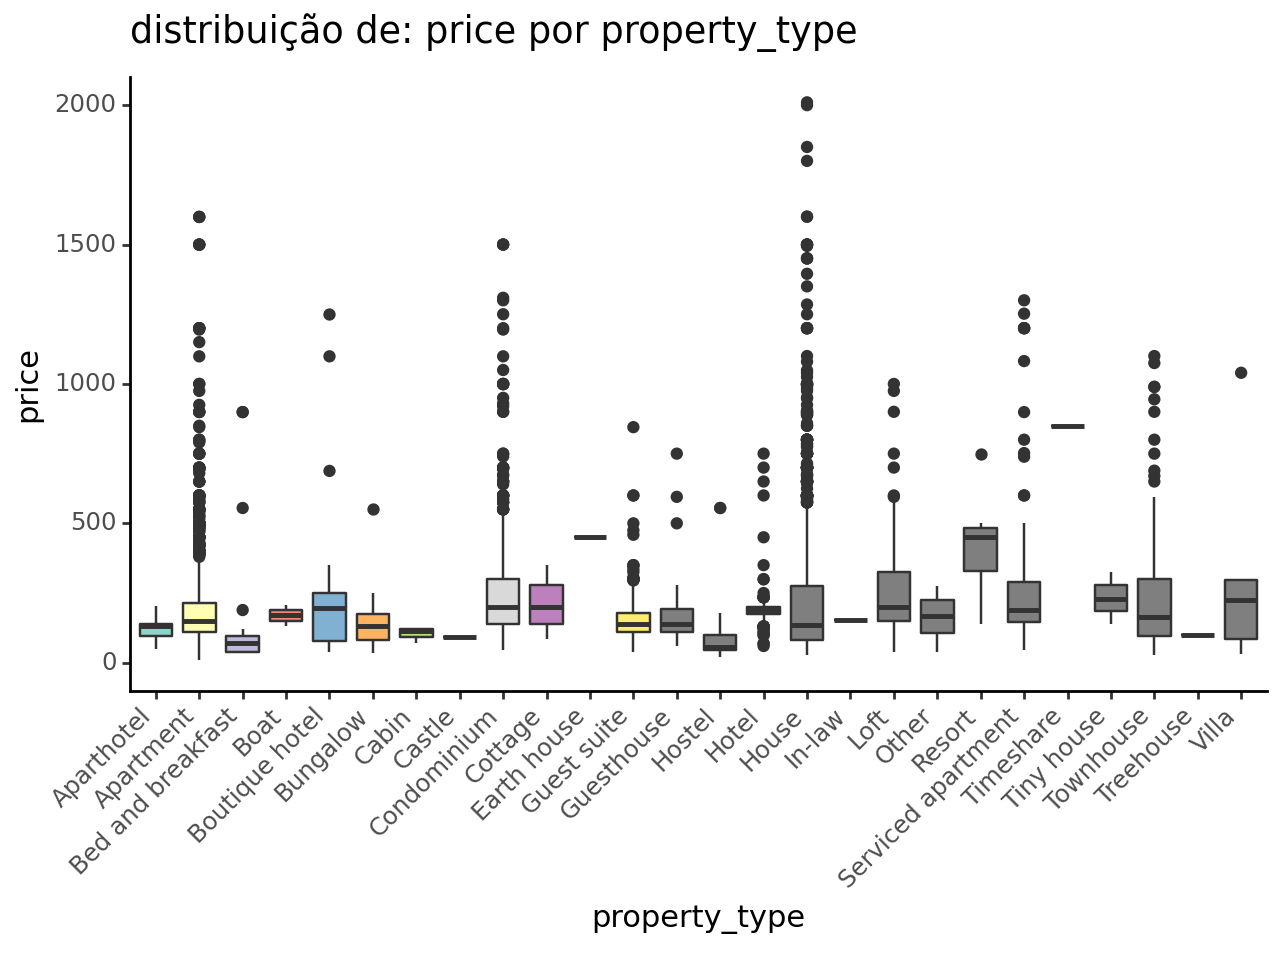

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
property_type,,,,,,,,,,,,,,,
Aparthotel,20,0.28,115.55,38.17,50.0,63.5,80.4,99.0,105.6,130.0,134.0,140.0,140.0,140.5,205.0
Apartment,3010,42.12,194.22,241.06,10.0,80.0,99.0,120.0,139.0,150.0,172.0,200.0,240.0,305.1,8000.0
Bed and breakfast,29,0.41,142.62,230.75,38.0,38.0,38.0,38.0,40.4,69.0,85.4,95.0,99.0,262.2,899.0
Boat,2,0.03,169.50,54.45,131.0,138.7,146.4,154.1,161.8,169.5,177.2,184.9,192.6,200.3,208.0
Boutique hotel,183,2.56,187.64,144.43,39.0,75.0,79.0,79.0,123.8,195.0,200.0,250.0,268.8,300.0,1249.0
Bungalow,17,0.24,147.35,119.60,35.0,42.0,72.6,83.8,112.4,130.0,142.0,163.0,179.0,217.0,550.0
Cabin,3,0.04,103.00,29.87,69.0,78.2,87.4,96.6,105.8,115.0,117.0,119.0,121.0,123.0,125.0
Castle,1,0.01,92.00,NaN,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0
Condominium,760,10.64,302.29,617.87,45.0,99.0,128.0,150.0,172.0,200.0,229.0,272.9,350.0,480.5,10000.0


In [20]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'property_type',
                       ylim= 2000,
                       rotation = 45)

ut.tabela_descritiva(var1= 'price',
                      var2= 'property_type',
                      df = raw_data)

A cardinalidade desta variávele stá muito alta, vamos agrupar os tipos com menos de 100 observações em na catergoria others

In [21]:
contagem_categorias = raw_data['property_type'].value_counts()
categorias_a_agrupar = contagem_categorias[contagem_categorias < 100].index
raw_data['property_type'] = raw_data['property_type'].replace(categorias_a_agrupar, 'Others')

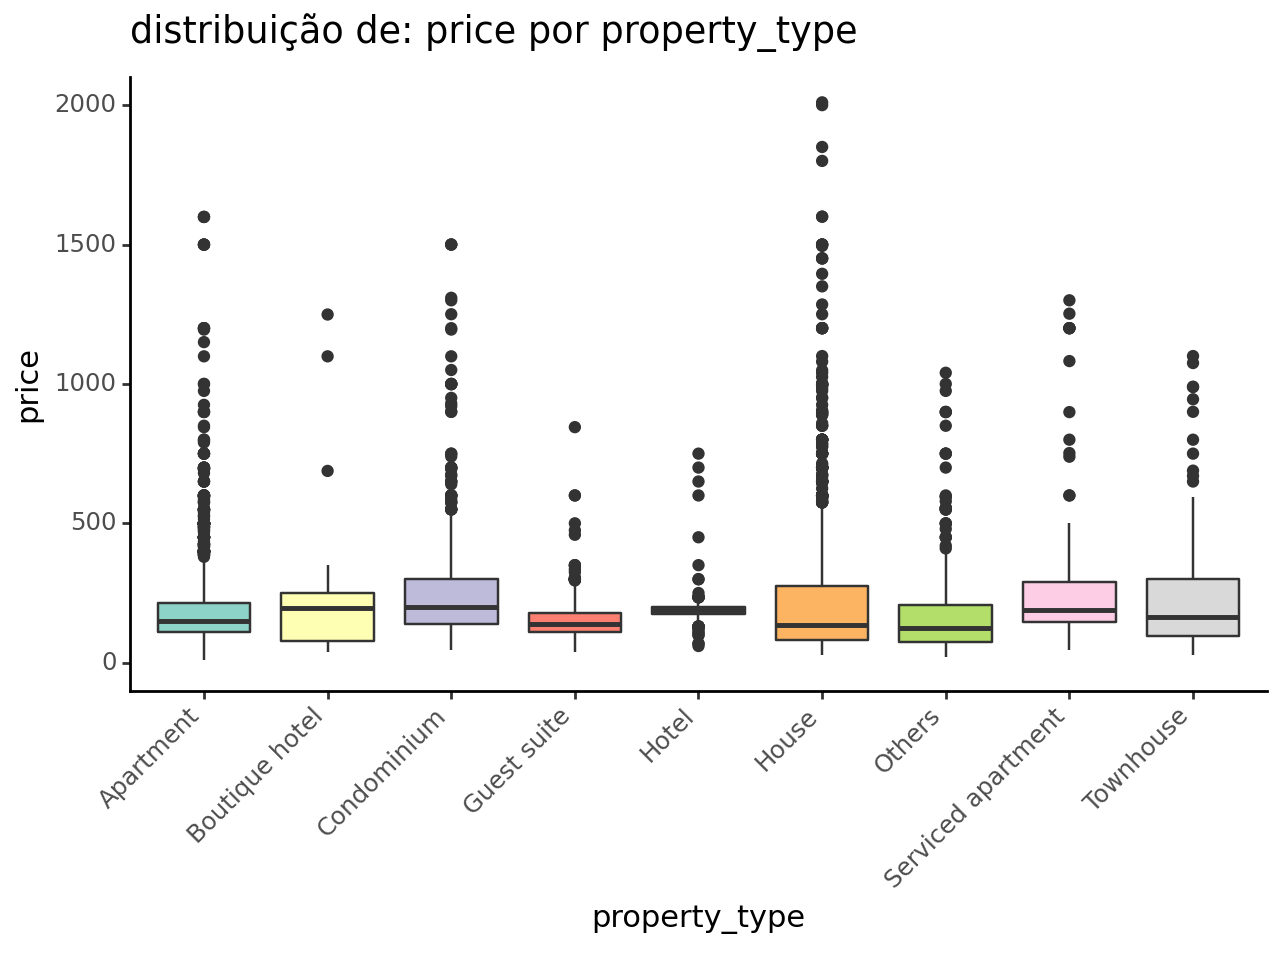

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
property_type,,,,,,,,,,,,,,,
Apartment,3010,42.12,194.22,241.06,10.0,80.0,99.0,120.0,139.0,150.0,172.0,200.0,240.0,305.1,8000.0
Boutique hotel,183,2.56,187.64,144.43,39.0,75.0,79.0,79.0,123.8,195.0,200.0,250.0,268.8,300.0,1249.0
Condominium,760,10.64,302.29,617.87,45.0,99.0,128.0,150.0,172.0,200.0,229.0,272.9,350.0,480.5,10000.0
Guest suite,496,6.94,152.95,73.76,39.0,90.0,100.0,115.5,125.0,139.0,150.0,166.5,195.0,225.0,845.0
Hotel,100,1.40,204.95,109.91,60.0,129.0,169.0,179.7,180.0,189.0,199.0,199.0,201.0,235.0,750.0
House,1990,27.85,224.50,300.09,28.0,59.0,75.0,90.0,107.0,135.0,170.0,235.0,300.0,480.1,8000.0
Others,351,4.91,184.64,206.20,19.0,45.0,59.0,88.0,100.0,125.0,150.0,189.0,250.0,355.0,2282.0
Serviced apartment,116,1.62,286.73,279.80,45.0,95.0,130.0,157.5,179.0,189.0,215.0,272.5,310.0,600.0,1300.0
Townhouse,140,1.96,246.10,225.62,29.0,69.0,84.0,110.0,128.0,165.5,206.0,275.0,350.0,549.0,1100.0


In [22]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'property_type',
                       ylim= 2000,
                       rotation = 45)

ut.tabela_descritiva(var1= 'price',
                      var2= 'property_type',
                      df = raw_data)

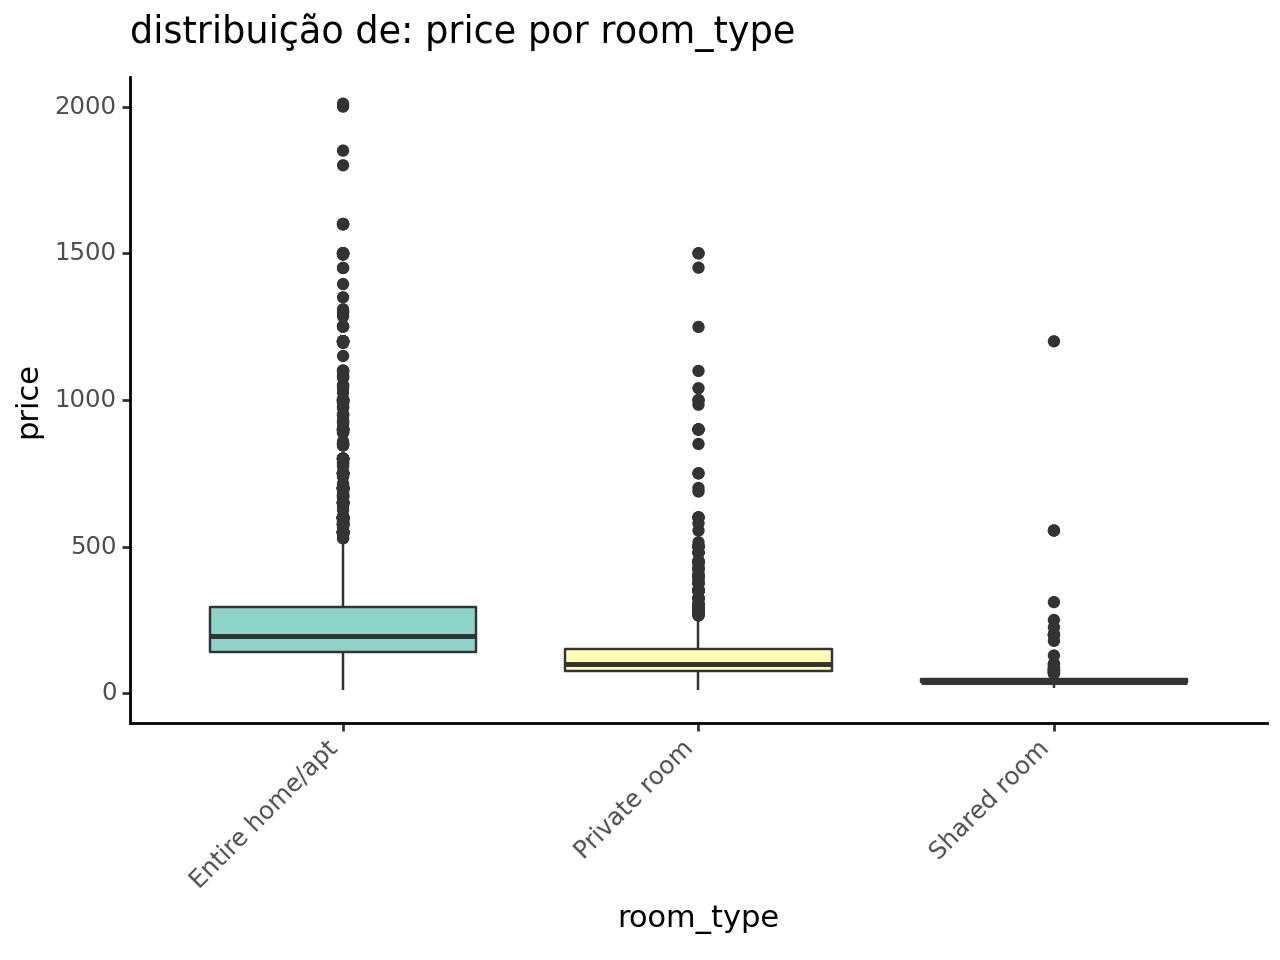

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
room_type,,,,,,,,,,,,,,,
Entire home/apt,4364,61.07,268.02,358.61,10.0,109.0,131.6,150.0,168.2,195.0,224.8,260.0,325.0,480.0,10000.0
Private room,2603,36.43,130.92,186.64,10.0,59.0,70.0,80.0,90.0,100.0,119.0,135.0,160.0,200.0,8000.0
Shared room,179,2.50,77.49,197.86,19.0,30.0,34.6,38.0,40.0,40.0,45.0,50.0,55.0,84.4,2281.0


In [23]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'price',
                       categorias = 'room_type',
                       ylim= 2000,
                       rotation = 45)

ut.tabela_descritiva(var1= 'price',
                      var2= 'room_type',
                      df = raw_data)

Antes de olhar para as colunas numéricas, vamos explorar as variáveis referentes ao score, pois elas podem ter uma alta correlação entre sí, o que geralmente não é bom para modelo de aprendizado de maquina.

In [24]:
scores = raw_data[['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]
scores.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.699940,0.669338,0.489325,0.605232,0.481081,0.685752
review_scores_accuracy,0.699940,1.000000,0.625998,0.507944,0.567516,0.389118,0.588734
review_scores_cleanliness,0.669338,0.625998,1.000000,0.418975,0.488496,0.339314,0.547830
review_scores_checkin,0.489325,0.507944,0.418975,1.000000,0.550516,0.290053,0.425009
review_scores_communication,0.605232,0.567516,0.488496,0.550516,1.000000,0.278149,0.480545
review_scores_location,0.481081,0.389118,0.339314,0.290053,0.278149,1.000000,0.457689
review_scores_value,0.685752,0.588734,0.547830,0.425009,0.480545,0.457689,1.000000


com exceção dos scores de location e de checkin, as outras variáveis parecem ter uma correlação bem grande entre sí. 
Como aparentemente o scores_rating pode ser um resumo dos outros scores, manterei apenas o review_score_rating e o os scores de chekin e location.

In [25]:
raw_data = raw_data.drop(columns=[ 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication','review_scores_value'])

In [26]:
raw_data[['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_checkin',
       'review_scores_location', 'price']].corr(method='spearman')['price']

host_total_listings_count   -0.163428
accommodates                 0.620304
bathrooms                    0.281274
bedrooms                     0.542449
beds                         0.506930
minimum_nights              -0.010028
number_of_reviews           -0.112376
review_scores_rating         0.227187
review_scores_checkin        0.074235
review_scores_location       0.171573
price                        1.000000
Name: price, dtype: float64

Ao fazer uma análise inicial antes de começar a explorar as variáveis numéricas,podemos notar algumas variáveis com correlação extramente baixa com o preço. Neste caso, descartarei estas variáveis com correlação menor que -0.2 ou mior que 0.2. 

In [27]:
raw_data = raw_data.drop(columns=[ 'host_total_listings_count',
       'minimum_nights', 'number_of_reviews','review_scores_checkin','review_scores_location'])

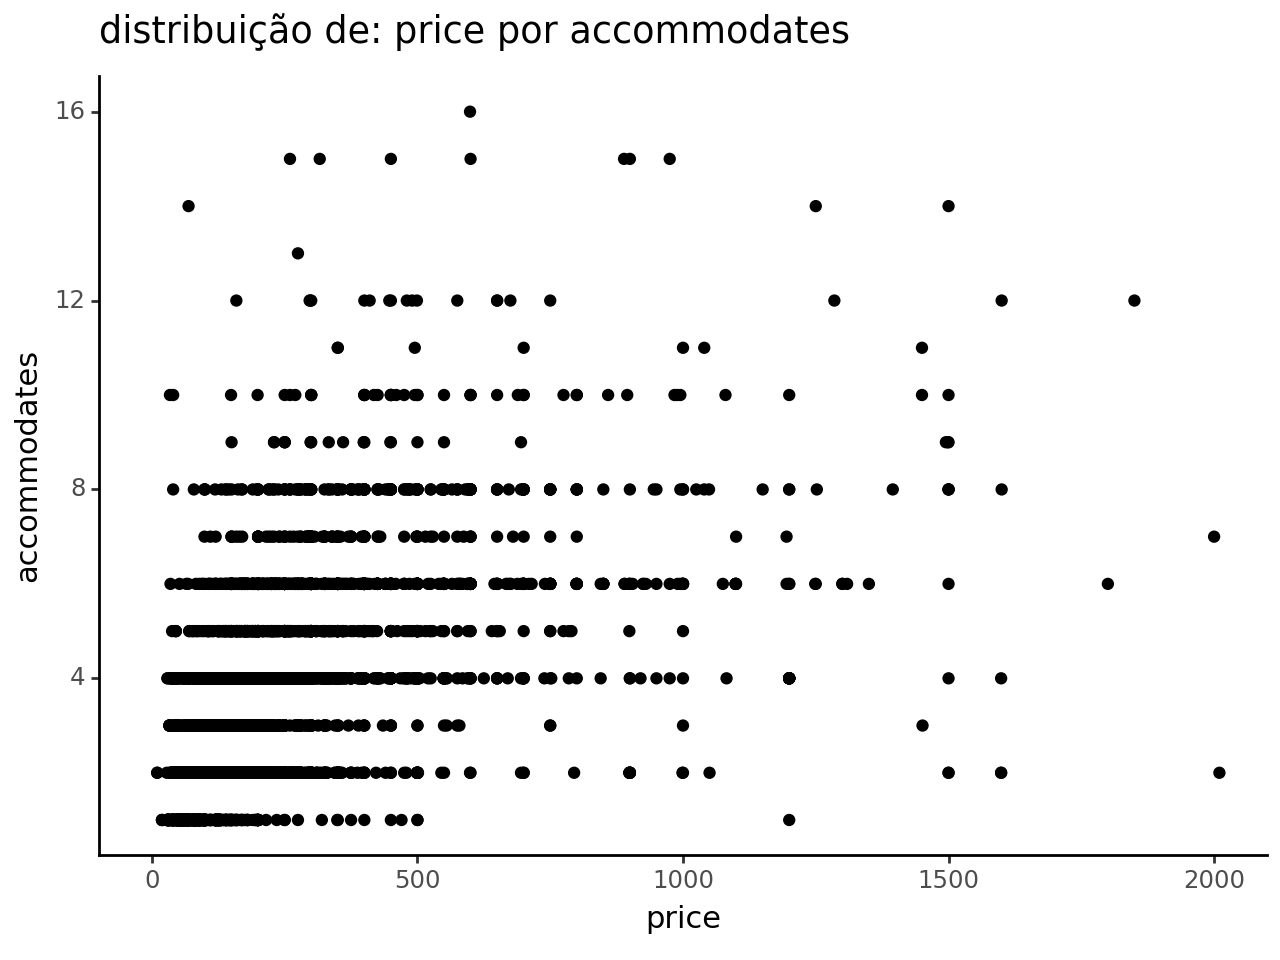

<Figure Size: (640 x 480)>

In [28]:
ut.grafico_dispersao(df = raw_data,
                       valor1 = 'price',
                       valor2 = 'accommodates')

c:\Users\DTI Digital\Desktop\TestePratico\airbnb\.venv\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 716 rows containing missing values.


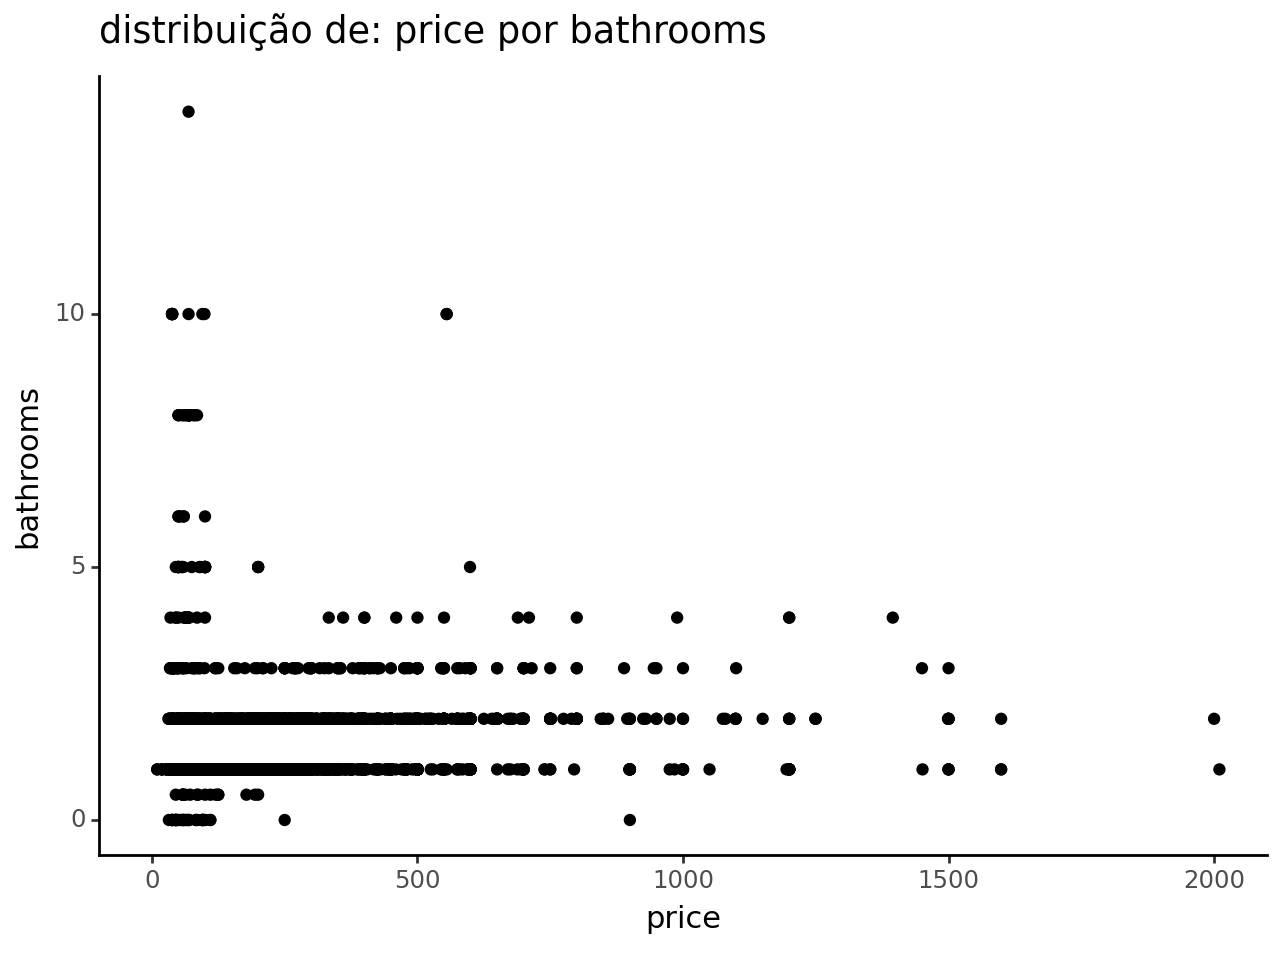

<Figure Size: (640 x 480)>

In [29]:
ut.grafico_dispersao(df = raw_data,
                       valor1 = 'price',
                       valor2 = 'bathrooms')

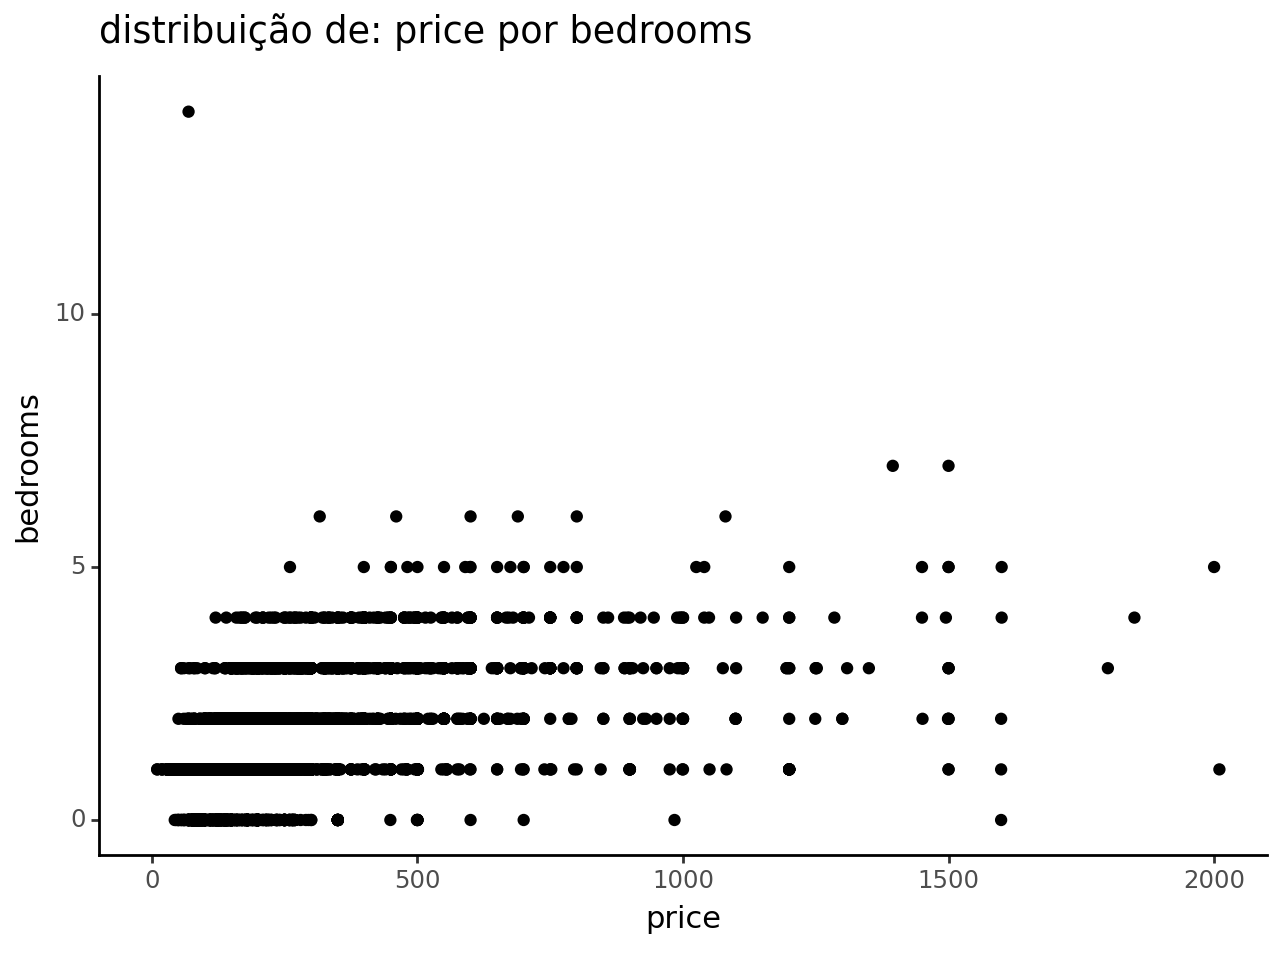

<Figure Size: (640 x 480)>

In [30]:
ut.grafico_dispersao(df = raw_data,
                       valor1 = 'price',
                       valor2 = 'bedrooms')

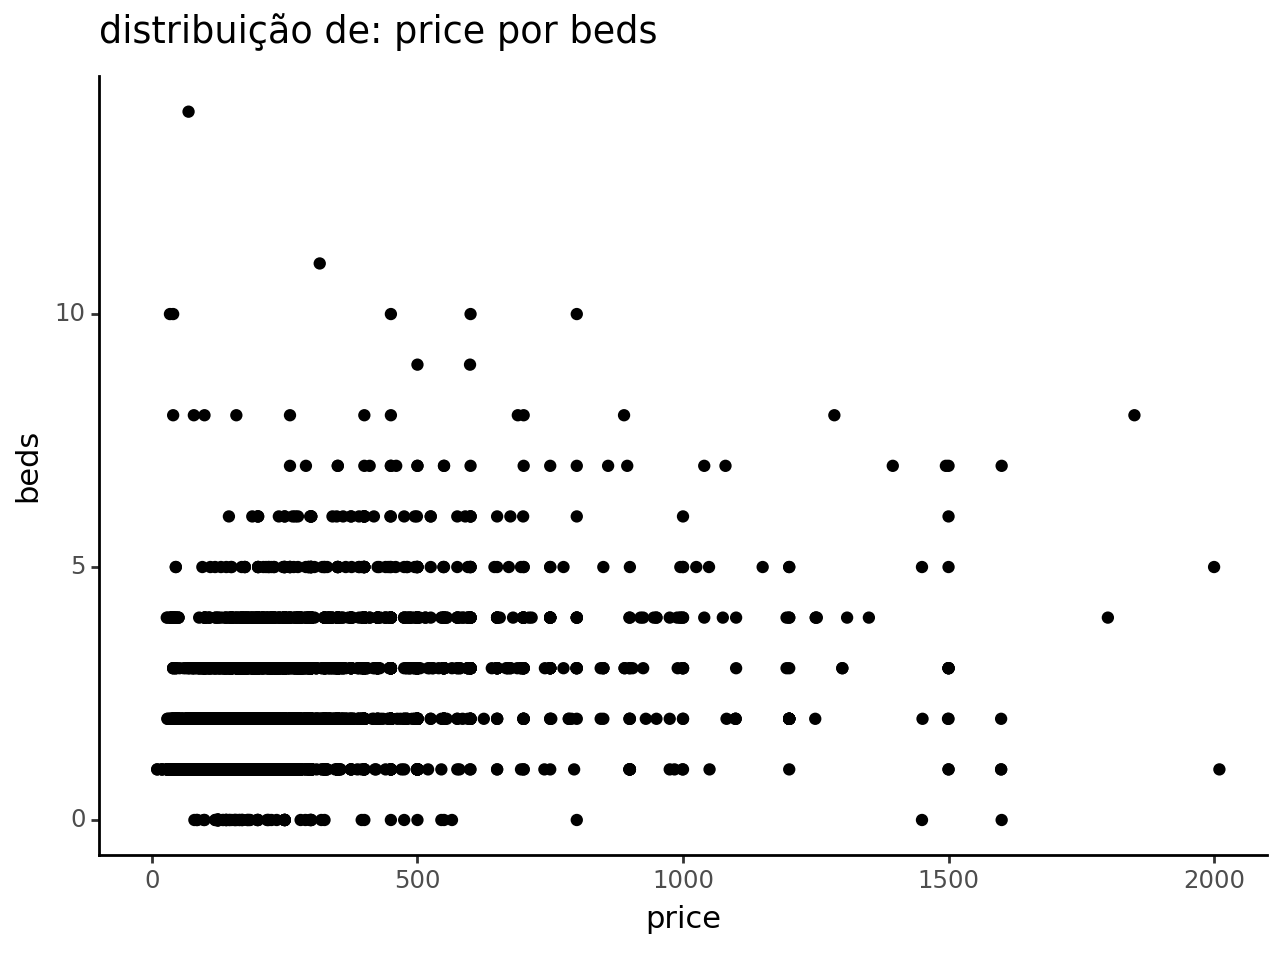

<Figure Size: (640 x 480)>

In [31]:
ut.grafico_dispersao(df = raw_data,
                       valor1 = 'price',
                       valor2 = 'beds')

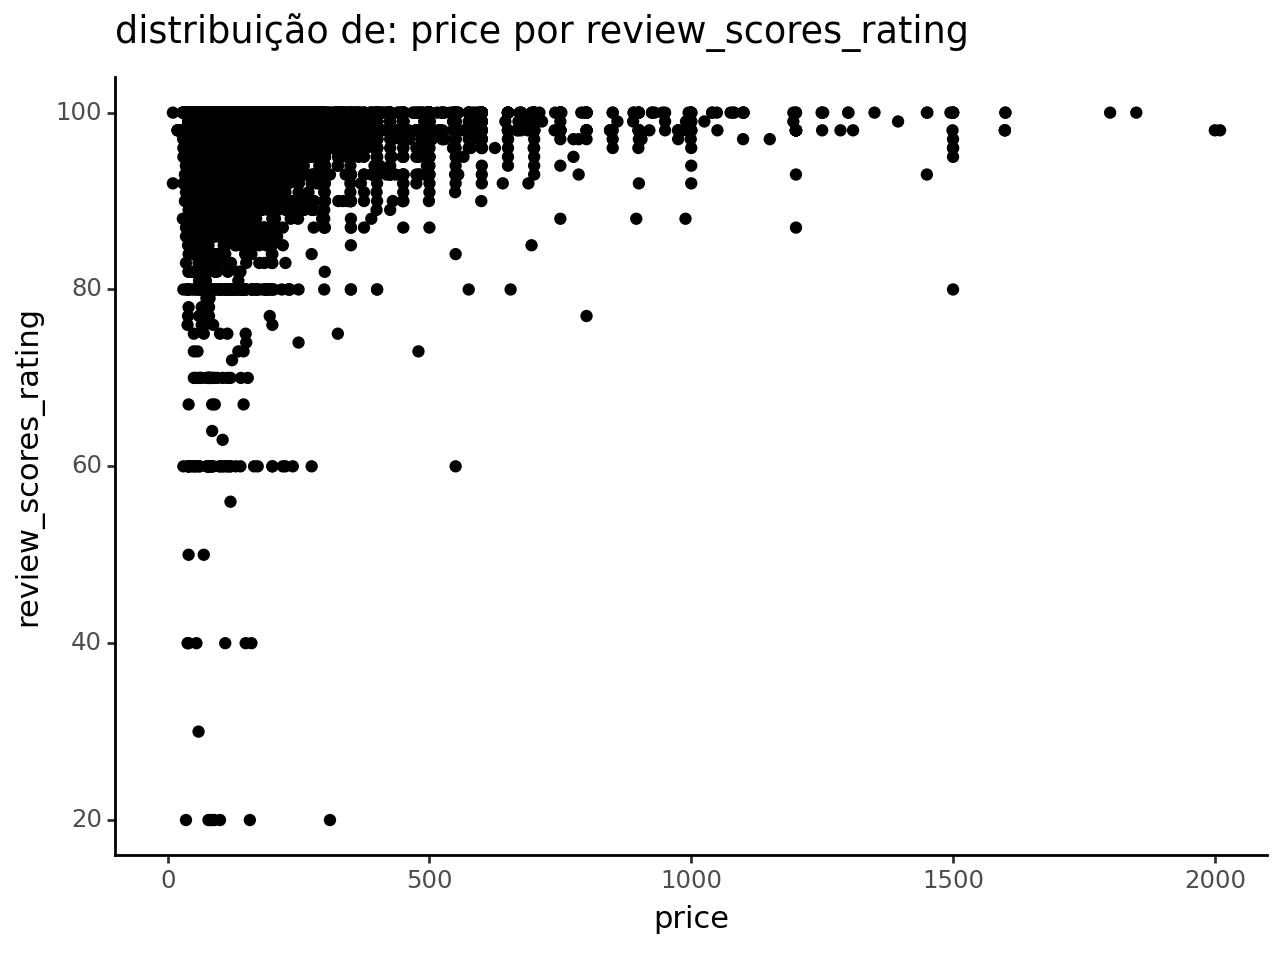

<Figure Size: (640 x 480)>

In [32]:
ut.grafico_dispersao(df = raw_data,
                       valor1 = 'price',
                       valor2 = 'review_scores_rating')

Com exceção score, em todos os casos, parece haver uma leve tendência crescente, enquanto, como esperado no caso dos scores, as maiores avaliações costuma trazer os melhores preços, embora também hajam avaliações altas com preços não tão altos.

In [33]:
raw_data.head()

,host_is_superhost,cancellation_policy,instant_bookable,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,price_region
0,t,moderate,t,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,97.0,170.0,region 150.0-200.0
1,f,strict_14_with_grace_period,f,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,98.0,235.0,region 200.0-250.0
2,f,strict_14_with_grace_period,f,Apartment,Private room,2.0,4.0,1.0,1.0,85.0,65.0,region 50.0-100.0
3,f,strict_14_with_grace_period,f,Apartment,Private room,2.0,4.0,1.0,1.0,93.0,65.0,region 50.0-100.0
4,f,strict_14_with_grace_period,f,House,Entire home/apt,5.0,NaN,2.0,2.0,97.0,785.0,Others


o Ultimo passo na tratativa e entendimento dos dados é a inputação de valores, nos casos onde a quantidade de banheiros não existe. 

In [34]:
raw_data['bathrooms'].describe()

count    6430.000000
mean        1.260886
std         0.775722
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: bathrooms, dtype: float64

Analisando a distribuição desta variável, podemos ver que na grande maioria dos casos, existe somente um banheiro, fazendo com que o valor 1, possa ser um bom valor para fazera inputação dos dados, no entanto a variável roo_type, parece influenciar um pouco nisso.

c:\Users\DTI Digital\Desktop\TestePratico\airbnb\.venv\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 716 rows containing non-finite values.


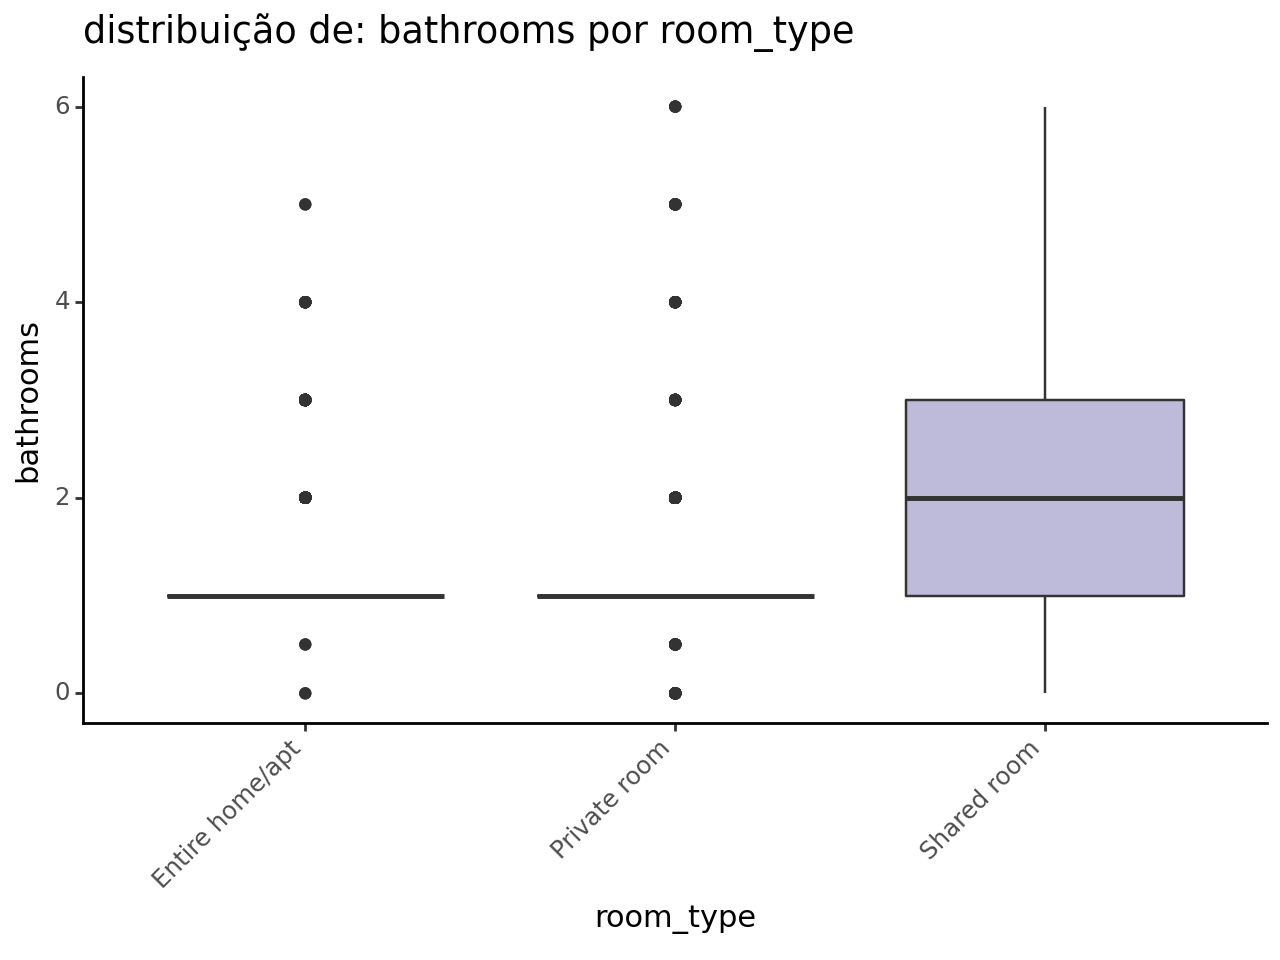

<Figure Size: (640 x 480)>

,n,%,Média,Desvio,Min,10%,20%,30%,40%,Mediana,60%,70%,80%,90%,Max
room_type,,,,,,,,,,,,,,,
Entire home/apt,3904,60.72,1.26,0.51,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0
Private room,2375,36.94,1.20,0.86,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,14.0
Shared room,151,2.35,2.38,2.44,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,5.0,10.0


In [35]:
ut.boxplot_comparativo(df = raw_data,
                       valores= 'bathrooms',
                       categorias = 'room_type',
                       ylim= 6,
                       rotation = 45)

ut.tabela_descritiva(var1= 'bathrooms',
                      var2= 'room_type',
                      df = raw_data)

De acordo com a distribuição dos dados, podemos ver que nos casos de Entira home/apt e Private room, o preenchimento dos valores faltantes com o 1 é uma boa escolha, no entanto no caso de quartos compartilhados, a mediana é igual a 2, o que torna mais interessante a inserção do numero 2 nestes casos.

In [36]:
raw_data

,host_is_superhost,cancellation_policy,instant_bookable,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,price_region
0,t,moderate,t,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,97.0,170.0,region 150.0-200.0
1,f,strict_14_with_grace_period,f,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,98.0,235.0,region 200.0-250.0
2,f,strict_14_with_grace_period,f,Apartment,Private room,2.0,4.0,1.0,1.0,85.0,65.0,region 50.0-100.0
3,f,strict_14_with_grace_period,f,Apartment,Private room,2.0,4.0,1.0,1.0,93.0,65.0,region 50.0-100.0
4,f,strict_14_with_grace_period,f,House,Entire home/apt,5.0,NaN,2.0,2.0,97.0,785.0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
7141,f,flexible,t,House,Entire home/apt,3.0,1.0,1.0,2.0,98.0,163.0,region 150.0-200.0
7142,t,flexible,t,Guest suite,Entire home/apt,2.0,1.0,0.0,1.0,98.0,160.0,region 150.0-200.0
7143,t,flexible,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,98.0,249.0,region 200.0-250.0
7144,f,flexible,t,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,98.0,105.0,region 100.0-150.0


In [37]:
raw_data['bathrooms'] = raw_data.apply(lambda row: ut.preenche_na(row, 'bathrooms', 'room_type'), axis=1)



Convertendo as colunas com t e f para 0 e 1

In [38]:
raw_data.head()
raw_data['host_is_superhost'] = raw_data['host_is_superhost'].replace({'t': 1, 'f': 0})
raw_data['instant_bookable'] = raw_data['instant_bookable'].replace({'t': 1, 'f': 0})

,host_is_superhost,cancellation_policy,instant_bookable,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,price_region
0,t,moderate,t,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,97.0,170.0,region 150.0-200.0
1,f,strict_14_with_grace_period,f,Apartment,Entire home/apt,5.0,1.0,2.0,3.0,98.0,235.0,region 200.0-250.0
2,f,strict_14_with_grace_period,f,Apartment,Private room,2.0,4.0,1.0,1.0,85.0,65.0,region 50.0-100.0
3,f,strict_14_with_grace_period,f,Apartment,Private room,2.0,4.0,1.0,1.0,93.0,65.0,region 50.0-100.0
4,f,strict_14_with_grace_period,f,House,Entire home/apt,5.0,1.0,2.0,2.0,97.0,785.0,Others


## Separando os dados em treino e teste

A separação em treino e teste será feita numa proporção 70-30

In [39]:
X = raw_data[['price']]
y = raw_data.drop(columns= ['price'])

In [40]:
X_train, X_test, y_train,  y_test = train_test_split(y ,  X,
                          random_state=2, 
                          train_size=0.7, shuffle=True) 

In [41]:
print('X_train : ') 
print(X_train.shape) 

print('X_test : ') 
print(X_test.shape) 

print('y_train : ') 
print(y_train.shape) 
 
print('y_test : ')  
print(y_test.shape)

X_train : 
(5002, 11)
X_test : 
(2144, 11)
y_train : 
(5002, 1)
y_test : 
(2144, 1)


Por fim, vamos salvar os dados para utiliza-los no treinamento do modelo

In [42]:
X_train.to_csv('data/x_train.csv')
y_train.to_csv('data/y_train.csv')
X_test.to_csv('data/X_test.csv')
y_test.to_csv('data/y_test.csv')